In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('data\survey_results_public.csv')
data.head()

Split by ";" and take the first value

In [ ]:
data['DevType'].unique()

array([nan,
       'Data scientist or machine learning specialist;Developer, front-end;Engineer, data;Engineer, site reliability',
       'Developer, full-stack', ...,
       'Data scientist or machine learning specialist;Developer, front-end;Developer, full-stack;Developer, back-end;Developer, QA or test;Developer, mobile;Database administrator;Cloud infrastructure engineer;Data or business analyst;Designer;Blockchain',
       'Developer, front-end;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications;Developer, mobile;Educator;Developer, embedded applications or devices',
       'Developer, front-end;Engineer, data;Engineer, site reliability;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications;Developer, QA or test;Student;Developer, mobile;Academic researcher;DevOps specialist;Developer, embedded applications or devices;Developer, game or graphics;Cloud infrastructure engineer;Data or business analyst;Designer;Scie

In [ ]:
len(data['DevType'].unique())

9985

In [ ]:
data['DevType'] = data['DevType'].str.split(";")
data['DevType'] = data['DevType'].str[0]

In [ ]:
len(data['DevType'].unique())

30

In [ ]:
data['DevType'].unique().tolist()

[nan,
 'Data scientist or machine learning specialist',
 'Developer, full-stack',
 'Developer, front-end',
 'Developer, back-end',
 'Developer, desktop or enterprise applications',
 'Engineering manager',
 'Engineer, data',
 'Student',
 'Other (please specify):',
 'Engineer, site reliability',
 'Developer, mobile',
 'Marketing or sales professional',
 'Developer, embedded applications or devices',
 'DevOps specialist',
 'Designer',
 'Database administrator',
 'System administrator',
 'Developer, QA or test',
 'Product manager',
 'Project manager',
 'Data or business analyst',
 'Senior Executive (C-Suite, VP, etc.)',
 'Security professional',
 'Educator',
 'Academic researcher',
 'Developer, game or graphics',
 'Cloud infrastructure engineer',
 'Scientist',
 'Blockchain']

In [ ]:
data['DevType'].value_counts()

Developer, full-stack                            16664
Developer, front-end                             15375
Developer, back-end                              10491
Data scientist or machine learning specialist     3424
Engineer, data                                    2058
Developer, mobile                                 1812
Developer, desktop or enterprise applications     1806
Student                                           1662
Other (please specify):                           1358
Engineer, site reliability                        1182
Engineering manager                                731
Developer, embedded applications or devices        654
Academic researcher                                570
DevOps specialist                                  546
Developer, QA or test                              514
Educator                                           320
Senior Executive (C-Suite, VP, etc.)               289
Data or business analyst                           282
Project ma

In [29]:
df = data[['Country','EdLevel','YearsCodePro','Employment','ConvertedCompYearly']]
df = df.rename({'ConvertedCompYearly':'Salary'}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time",NaN


In [31]:
df = df[df['Salary'].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",60307.0
11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",194400.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38071 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       38071 non-null  object 
 1   EdLevel       38054 non-null  object 
 2   YearsCodePro  37935 non-null  object 
 3   Employment    38067 non-null  object 
 4   Salary        38071 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


In [33]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [34]:
df['Employment'].unique()

array(['Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed',
       'Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Employed, part-time', 'I prefer not to say',
       'Independent contractor, freelancer, or self-employed;Retired',
       'Retired', 'Employed, part-time;Retired',
       'Employed, full-time;Retired',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired'],
      dtype=object)

In [35]:
df['Employment'].value_counts()

Employed, full-time                                                                             31382
Independent contractor, freelancer, or self-employed                                             2739
Employed, full-time;Independent contractor, freelancer, or self-employed                         2633
Employed, part-time                                                                               632
Independent contractor, freelancer, or self-employed;Employed, part-time                          207
Employed, full-time;Employed, part-time                                                           151
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time      118
I prefer not to say                                                                                27
Retired                                                                                            18
Employed, part-time;Retired                                                       

In [36]:
df['Employment'] = df['Employment'].str.split(";")
df['Employment'] = df['Employment'].str[0]

In [37]:
df['Employment'].unique()

array(['Employed, full-time',
       'Independent contractor, freelancer, or self-employed',
       'Employed, part-time', 'I prefer not to say', 'Retired'],
      dtype=object)

In [38]:
df = df[df['Employment'] == 'Employed, full-time']
df = df.drop('Employment', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34288 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34288 non-null  object 
 1   EdLevel       34288 non-null  object 
 2   YearsCodePro  34288 non-null  object 
 3   Salary        34288 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.3+ MB


In [39]:
df['Country'].value_counts()

United States of America                                8292
Germany                                                 2540
United Kingdom of Great Britain and Northern Ireland    2435
India                                                   2049
Canada                                                  1363
                                                        ... 
Guinea                                                     1
Palau                                                      1
Monaco                                                     1
Saint Lucia                                                1
Seychelles                                                 1
Name: Country, Length: 157, dtype: int64

In [40]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [41]:
country_map = shorten_categories(df['Country'].value_counts(), 300)
df['Country']  = df['Country'].map(country_map)
df['Country'].value_counts()

United States of America                                8292
Other                                                   7834
Germany                                                 2540
United Kingdom of Great Britain and Northern Ireland    2435
India                                                   2049
Canada                                                  1363
France                                                  1202
Brazil                                                  1161
Spain                                                    921
Netherlands                                              749
Poland                                                   748
Australia                                                740
Italy                                                    710
Sweden                                                   597
Russian Federation                                       486
Switzerland                                              438
Turkey                  

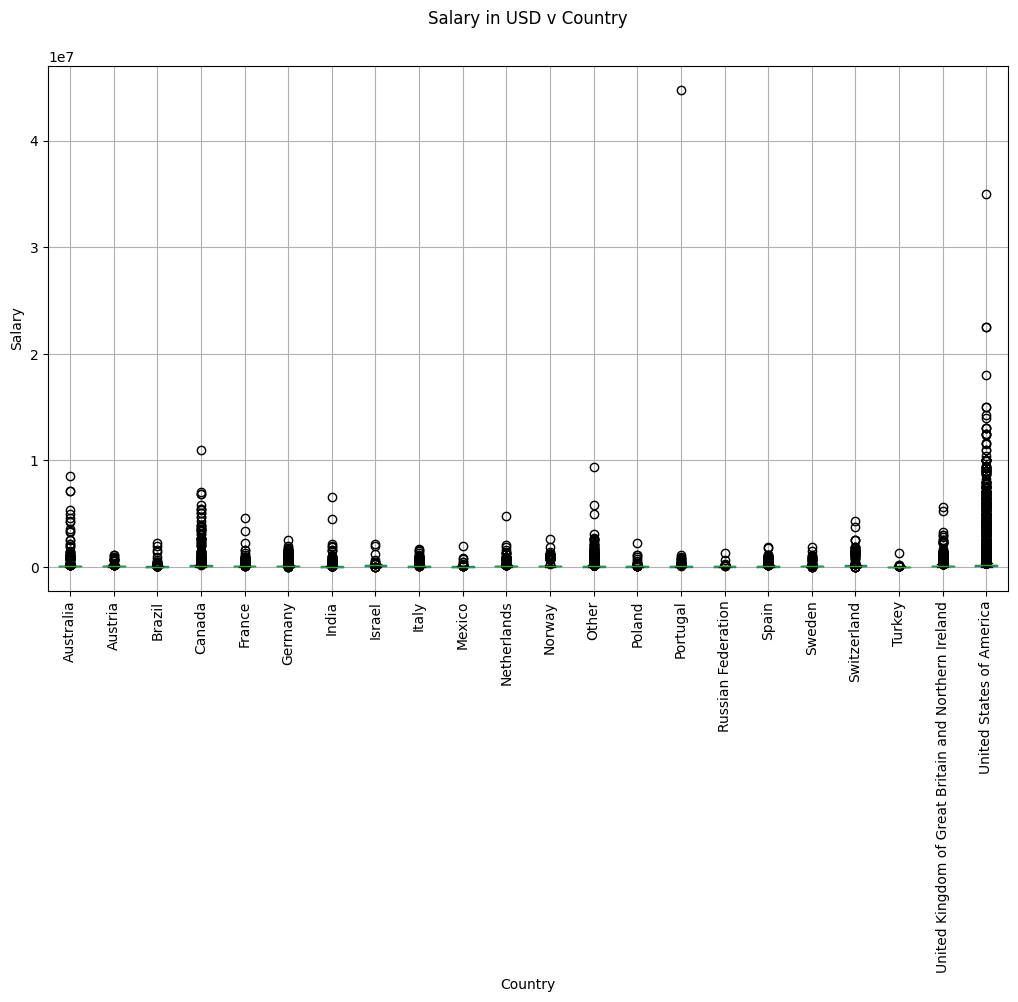

In [42]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary','Country', ax=ax)
plt.suptitle('Salary in USD v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()                       

In [43]:
df = df[df['Salary'] <= 300000]
df = df[df['Salary'] >= 5000]
df = df[df['Country'] != 'Other']

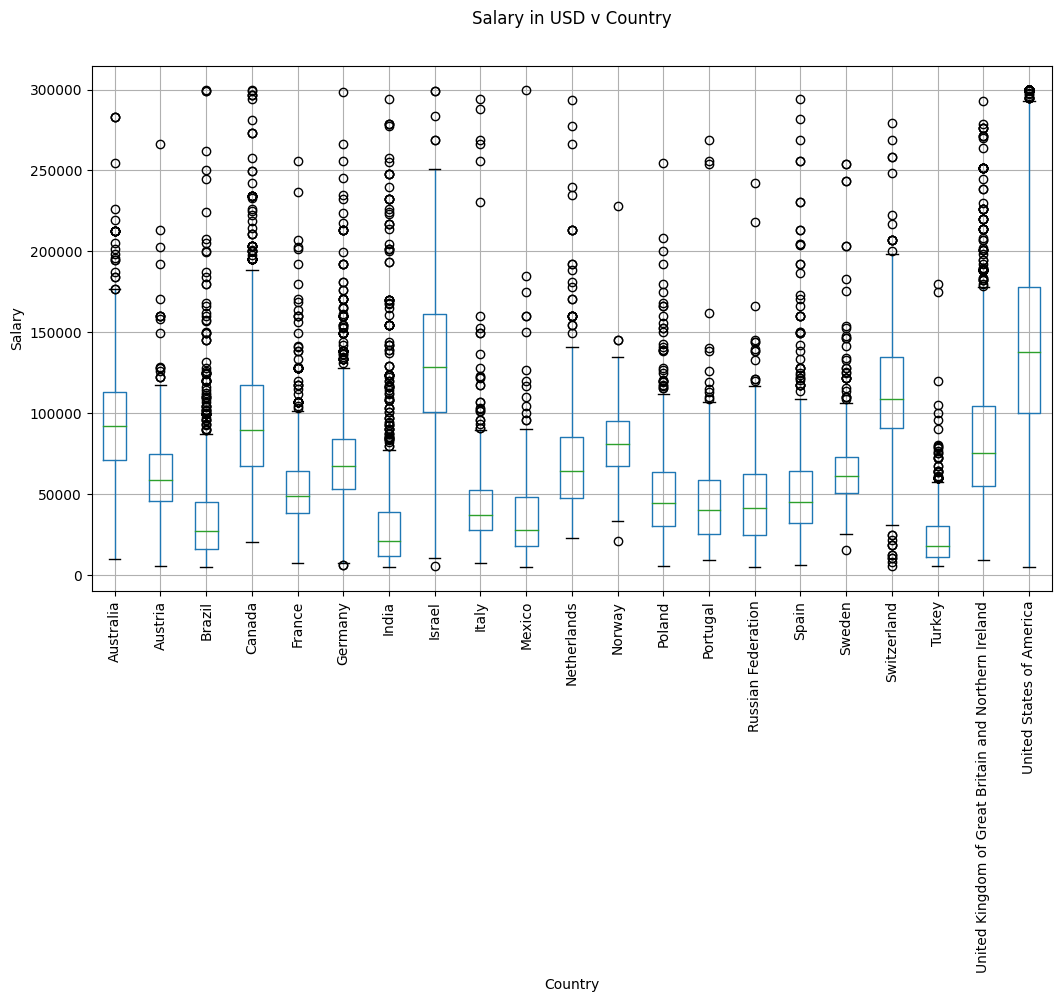

In [44]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary','Country', ax=ax)
plt.suptitle('Salary in USD v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()   

In [45]:
df['YearsCodePro'].unique()

array(['5', '17', '6', '2', '10', '22', '4', '20', '9', '14', '21', '15',
       '3', '25', '7', '8', '12', '19', '1', '24', '11', '23',
       'Less than 1 year', '18', '37', '46', '13', '32', '27', '28', '16',
       '31', '30', '34', '35', '26', '42', '38', '36', '40', '41', '29',
       '33', '39', '48', '45', '44', '43', 'More than 50 years', '47',
       '49', '50'], dtype=object)

In [48]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

In [49]:
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [50]:
df['EdLevel'].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else', 'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [51]:
def clean_education(x):
    if "Bachelor's degree" in x:
        return "Bachelor's degree"
    if "Master's degree" in x:
        return "Master's degree"
    if "Professional degree" in x:
        return "Post grad"
    return 'Less than a Bachelors'

In [52]:
df['EdLevel'] = df['EdLevel'].apply(clean_education)
df['EdLevel'].unique()

array(['Less than a Bachelors', 'Post grad'], dtype=object)